In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

----

CHIAMARE 'df' IL DATASET CHE SI VUOLE UTILIZZARE PER DATA UNDERSTANDING

In [7]:
df_training = pd.read_csv("training.csv") # dataset unico
df_test = pd.read_csv('test.csv')
df = pd.read_csv('dataset.csv')

print(len(df_training))

#df = pd.concat([df, df1, df2], axis = 0)
df = df.drop(columns=["Unnamed: 0"])

df_datatraining = pd.read_csv("datatraining.csv")
df_datatest = pd.read_csv('datatest.csv')
df_datatest2 = pd.read_csv('datatest2.csv')

print()
print(len(df))

14392

20560


In [24]:
df.head(20)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,day,hour,minute,day_minute,cumulative_hour,cumulative_minute,weekend
0,2015-02-02 14:19:00,23.7000,26.2720,585.200000,749.200000,0.004764,1,2,14,19,859,0,0,0
1,2015-02-02 14:19:59,23.7180,26.2900,578.400000,760.400000,0.004773,1,2,14,20,860,0,1,0
2,2015-02-02 14:21:00,23.7300,26.2300,572.666667,769.666667,0.004765,1,2,14,21,861,0,2,0
3,2015-02-02 14:22:00,23.7225,26.1250,493.750000,774.750000,0.004744,1,2,14,22,862,0,3,0
4,2015-02-02 14:23:00,23.7540,26.2000,488.600000,779.000000,0.004767,1,2,14,23,863,0,4,0
5,2015-02-02 14:23:59,23.7600,26.2600,568.666667,790.000000,0.004779,1,2,14,24,864,0,5,0
6,2015-02-02 14:25:00,23.7300,26.2900,536.333333,798.000000,0.004776,1,2,14,25,865,0,6,0
7,2015-02-02 14:25:59,23.7540,26.2900,509.000000,797.000000,0.004783,1,2,14,26,866,0,7,0
8,2015-02-02 14:26:59,23.7540,26.3500,476.000000,803.200000,0.004794,1,2,14,27,867,0,8,0
9,2015-02-02 14:28:00,23.7360,26.3900,510.000000,809.000000,0.004796,1,2,14,28,868,0,9,0


In [9]:
df.loc[df['date'] == '2015-02-04 17:51']

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,day,hour,minute,day_minute,cumulative_hour,cumulative_minute,weekend


----

Plotting for all variables: histogram, distribution, boxplot

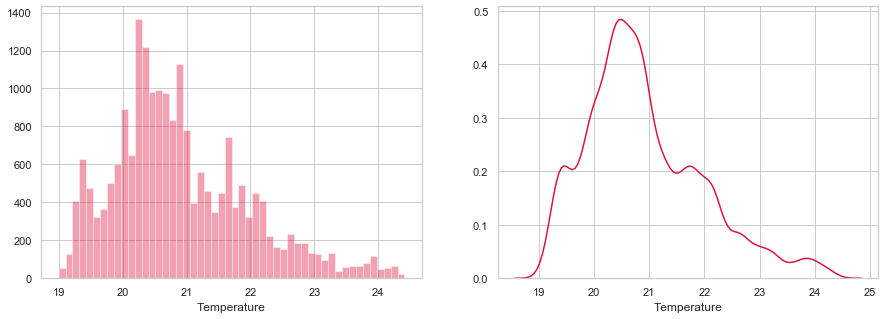

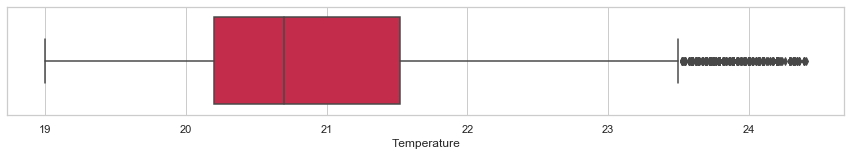

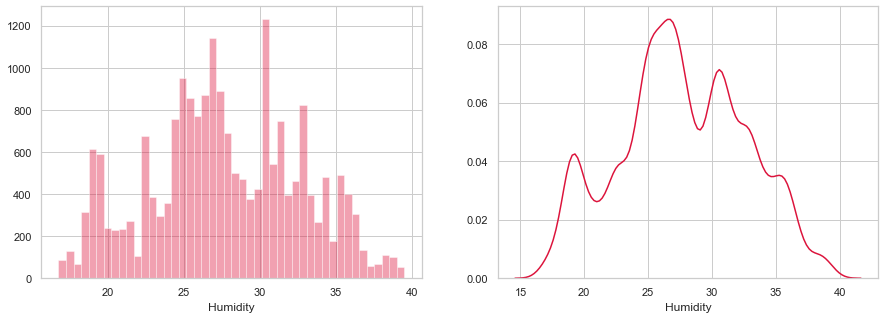

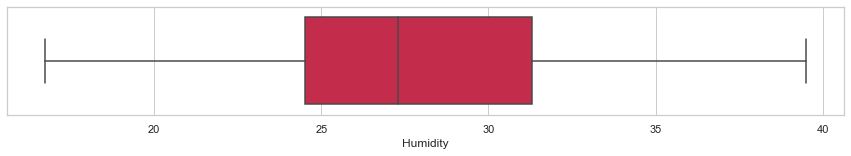

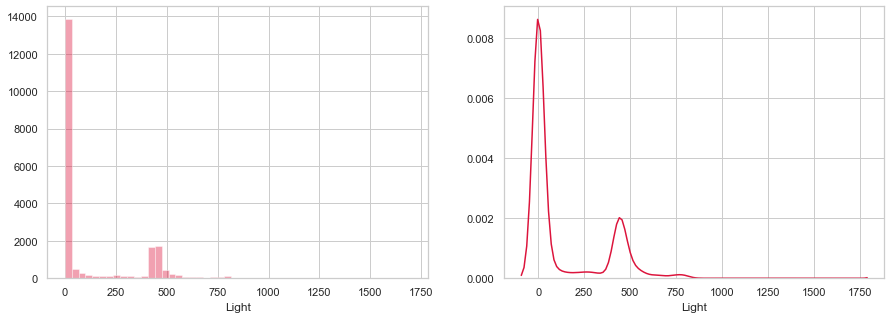

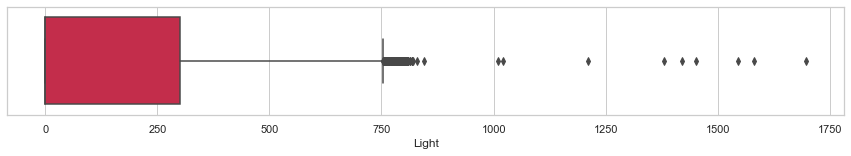

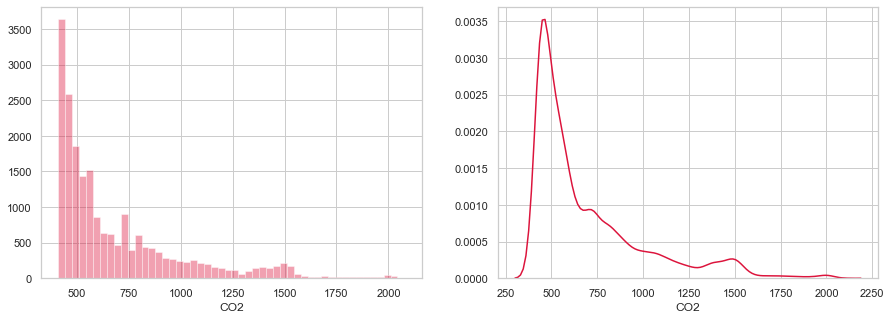

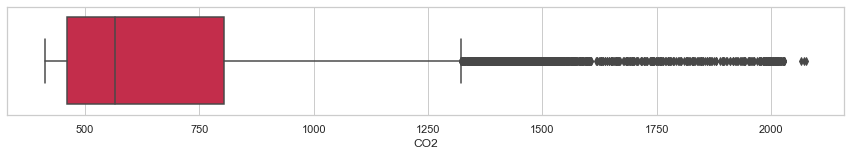

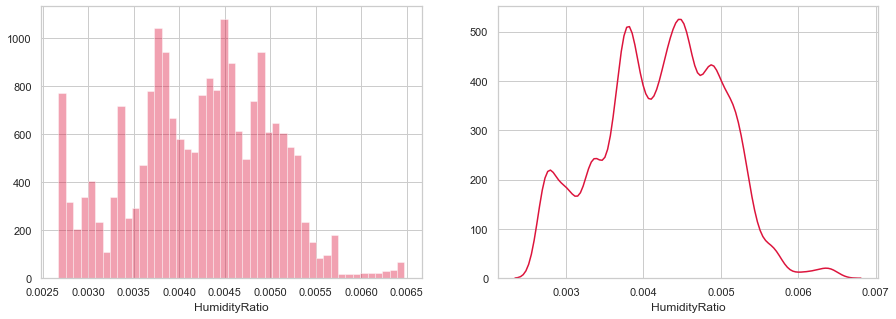

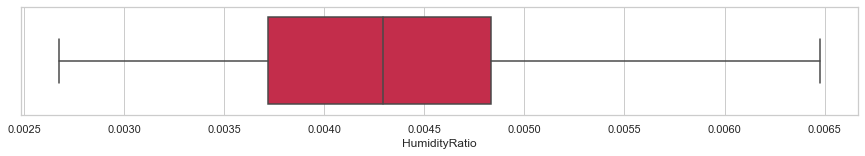

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

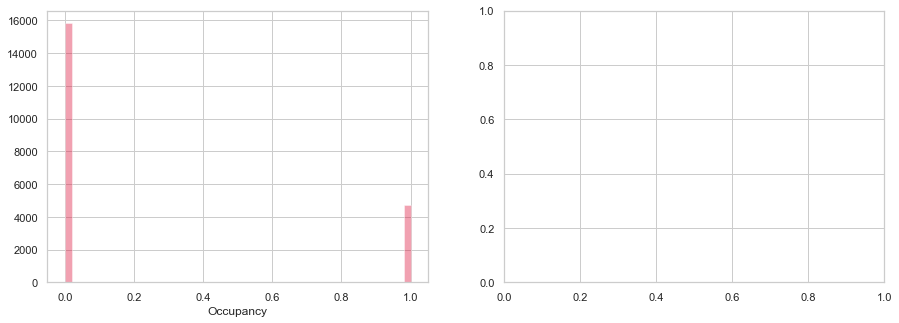

In [10]:
for c in [col for col in df._get_numeric_data().columns if (col != "Occupancy" or col != "weekend")]:
    fig_dims = (1,2)
    plt.figure(figsize=(15, 5))
    sns.set(style='whitegrid')

    #histogram and distribution
    plt.subplot2grid(fig_dims, (0,0))
    #plt.hist(df[c])
    sns.distplot(df[c], kde=False, color="crimson")
    plt.subplot2grid(fig_dims, (0,1))
    sns.distplot(df[c], hist=False, color="crimson") 
    plt.show()
    
    #boxplot
    plt.figure(figsize=(15,2))
    sns.boxplot(x=c, data=df, color="crimson")
    plt.show()

------

Plotting compisition of Occupancy values

0    15810
1     4750
Name: Occupancy, dtype: int64
{0: 0.52, 1: 0.18} {0: 0.25, 1: 0.05}


Text(0.5, 1.0, 'datatest2')

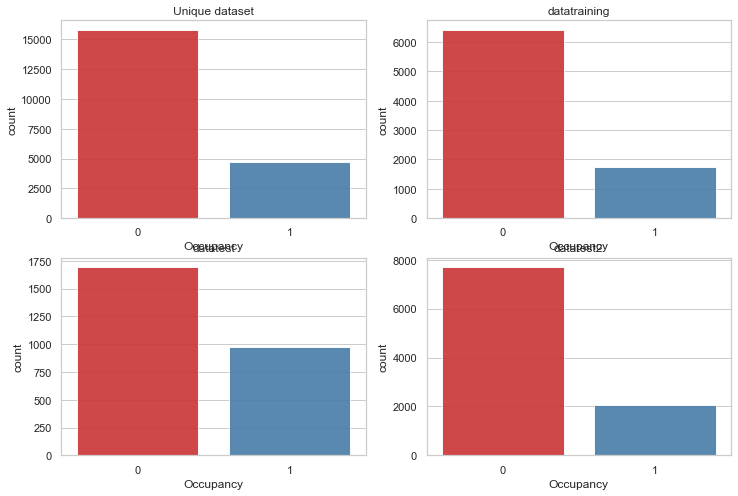

In [11]:
print(df['Occupancy'].value_counts())
per_train = {0: round(df_training['Occupancy'].value_counts()[0]/len(df), 2),
       1: round(df_training['Occupancy'].value_counts()[1]/len(df), 2)}

per_test = {0: round(df_test['Occupancy'].value_counts()[0]/len(df), 2),
       1: round(df_test['Occupancy'].value_counts()[1]/len(df), 2)}
print(per_train, per_test)

plt.figure(figsize = (12,8))
fig_dims = (2,2)
sns.set(style="whitegrid")
plt.subplot2grid(fig_dims, (0,0))
sns.countplot(x='Occupancy', data=df, alpha=0.90, palette='Set1')
plt.title("Unique dataset")
plt.subplot2grid(fig_dims, (0,1))
sns.countplot(x='Occupancy', data=df_datatraining, alpha=0.90, palette='Set1')
plt.title("datatraining")
plt.subplot2grid(fig_dims, (1,0))
sns.countplot(x='Occupancy', data=df_datatest, alpha=0.90, palette='Set1')
plt.title("datatest")
plt.subplot2grid(fig_dims, (1,1))
sns.countplot(x='Occupancy', data=df_datatest2, alpha=0.90, palette='Set1')
plt.title("datatest2")
#plt.show()
#sns.countplot(x='weekend', data=df, alpha=0.90, palette='Set3')

In [12]:
df

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,day,hour,minute,day_minute,cumulative_hour,cumulative_minute,weekend
0,2015-02-02 14:19:00,23.7000,26.2720,585.200000,749.200000,0.004764,1,2,14,19,859,0,0,0
1,2015-02-02 14:19:59,23.7180,26.2900,578.400000,760.400000,0.004773,1,2,14,20,860,0,1,0
2,2015-02-02 14:21:00,23.7300,26.2300,572.666667,769.666667,0.004765,1,2,14,21,861,0,2,0
3,2015-02-02 14:22:00,23.7225,26.1250,493.750000,774.750000,0.004744,1,2,14,22,862,0,3,0
4,2015-02-02 14:23:00,23.7540,26.2000,488.600000,779.000000,0.004767,1,2,14,23,863,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20555,2015-02-18 09:15:00,20.8150,27.7175,429.750000,1505.250000,0.004213,1,18,9,15,555,379,22736,0
20556,2015-02-18 09:16:00,20.8650,27.7450,423.500000,1514.500000,0.004230,1,18,9,16,556,379,22737,0
20557,2015-02-18 09:16:59,20.8900,27.7450,423.500000,1521.500000,0.004237,1,18,9,17,557,379,22738,0
20558,2015-02-18 09:17:59,20.8900,28.0225,418.750000,1632.000000,0.004279,1,18,9,18,558,379,22739,0


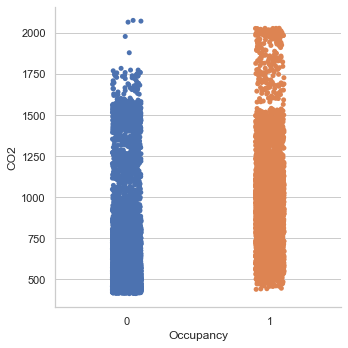

In [13]:
sns.catplot(x="Occupancy", y = 'CO2', data=df)

# Plots with 'date' informations

Using features created, we inspect the behaviour of other features

In [14]:
# non servono più perché ora per stampare i grafici si usano i cicli
# non li elimino perché forse ci possono essere ancora utili
day2  = df.loc[df['day'] ==  2]
day3  = df.loc[df['day'] ==  3]
day4  = df.loc[df['day'] ==  4]
day5  = df.loc[df['day'] ==  5]
day6  = df.loc[df['day'] ==  6]
day7  = df.loc[df['day'] ==  7]
day8  = df.loc[df['day'] ==  8]
day9  = df.loc[df['day'] ==  9]
day10 = df.loc[df['day'] == 10]
day11 = df.loc[df['day'] == 11]
day12 = df.loc[df['day'] == 12]
day13 = df.loc[df['day'] == 13]
day14 = df.loc[df['day'] == 14]

In [15]:
day7

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,day,hour,minute,day_minute,cumulative_hour,cumulative_minute,weekend
5914,2015-02-07 00:00:00,20.000000,18.700000,0.0,438.000000,0.002696,0,7,0,0,0,106,6341,1
5915,2015-02-07 00:01:00,19.972500,18.745000,0.0,433.666667,0.002698,0,7,0,1,1,106,6342,1
5916,2015-02-07 00:02:00,20.000000,18.790000,0.0,434.500000,0.002709,0,7,0,2,2,106,6343,1
5917,2015-02-07 00:03:00,20.000000,18.700000,0.0,434.000000,0.002696,0,7,0,3,3,106,6344,1
5918,2015-02-07 00:04:00,20.000000,18.745000,0.0,438.500000,0.002703,0,7,0,4,4,106,6345,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7349,2015-02-07 23:55:00,19.633333,29.356667,0.0,436.666667,0.004147,0,7,23,55,1435,129,7776,1
7350,2015-02-07 23:55:59,19.600000,29.390000,0.0,432.000000,0.004143,0,7,23,56,1436,129,7777,1
7351,2015-02-07 23:57:00,19.600000,29.390000,0.0,438.000000,0.004143,0,7,23,57,1437,129,7778,1
7352,2015-02-07 23:57:59,19.600000,29.390000,0.0,440.666667,0.004143,0,7,23,58,1438,129,7779,1


Wall time: 2.3 s


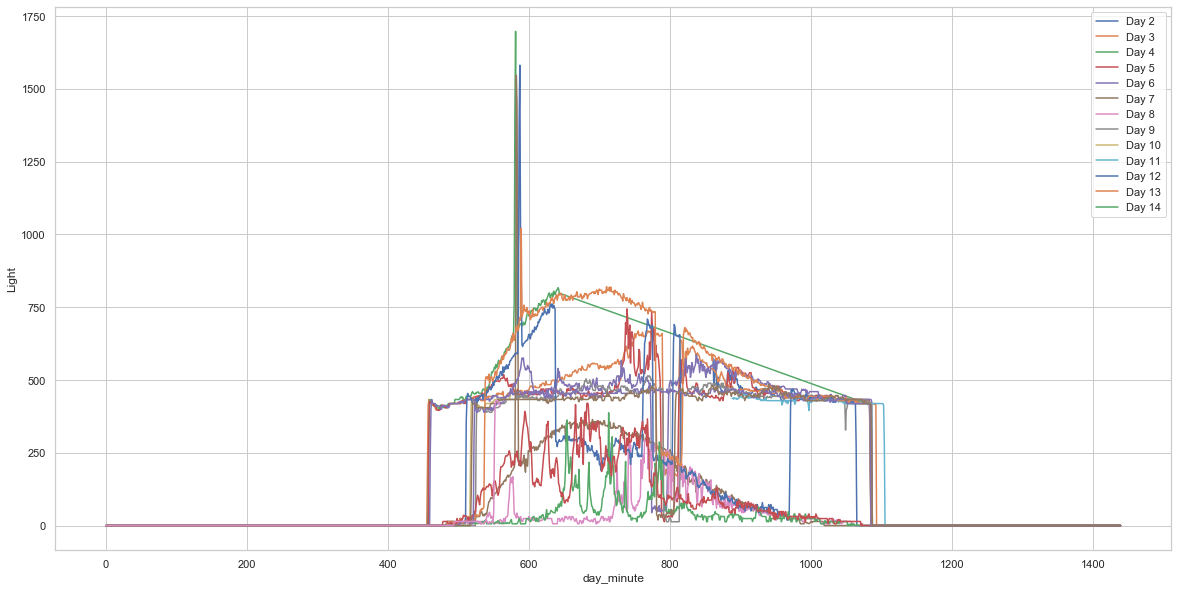

In [16]:
%%time
plt.figure(figsize=(20,10))
sns.set(style='whitegrid')
for i in df['day'].unique():
    sns.lineplot(x="day_minute", y = 'Light', data = df.loc[df['day'] == i], palette = 'Set1')
plt.legend(('Day 2', 'Day 3', 'Day 4', 'Day 5', 'Day 6', 'Day 7', 'Day 8', 'Day 9', 'Day 10', 'Day 11', 'Day 12', 'Day 13', 'Day 14'))

Wall time: 2.88 s


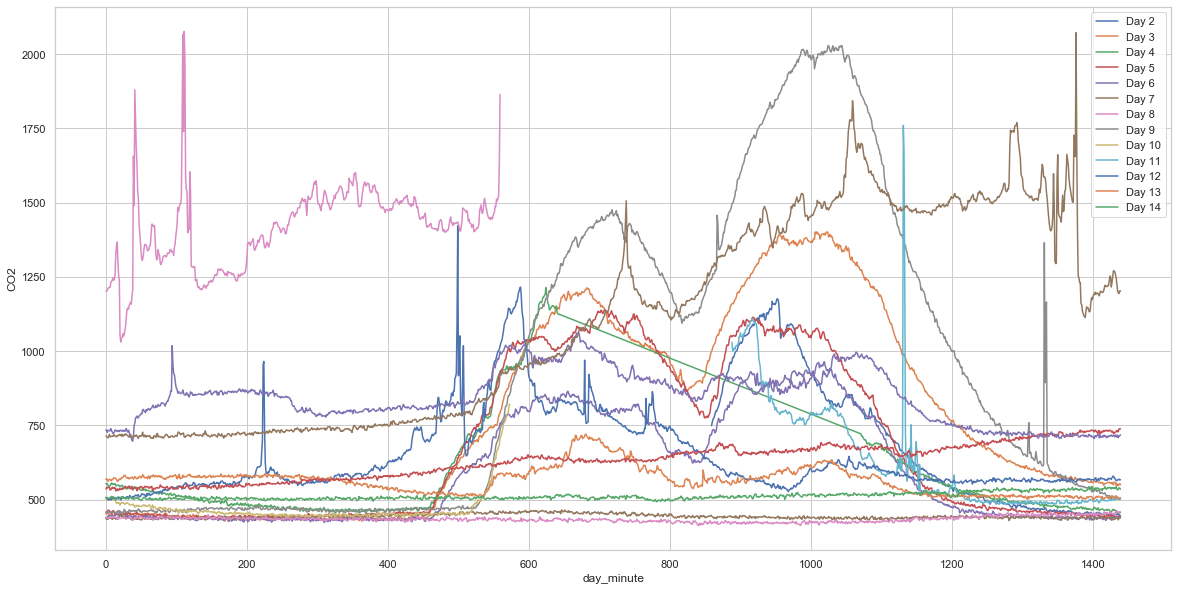

In [17]:
%%time
plt.figure(figsize=(20,10))
sns.set(style='whitegrid')
for i in df['day'].unique():
    sns.lineplot(x="day_minute", y = 'CO2', data = df.loc[df['day'] == i], palette = 'Set1')
plt.legend(('Day 2', 'Day 3', 'Day 4', 'Day 5', 'Day 6', 'Day 7', 'Day 8', 'Day 9', 'Day 10', 'Day 11', 'Day 12', 'Day 13', 'Day 14'))

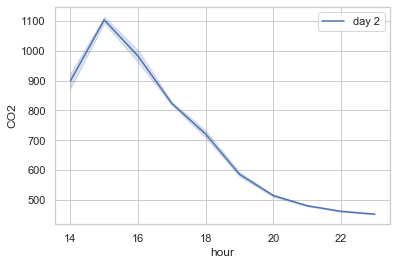

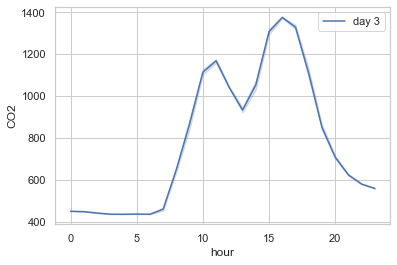

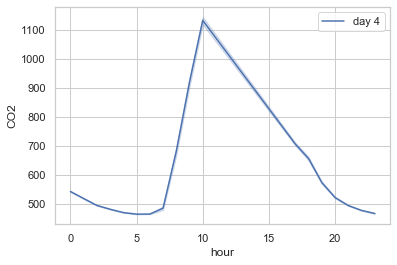

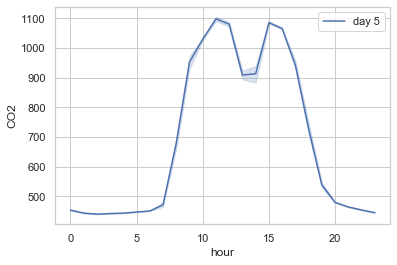

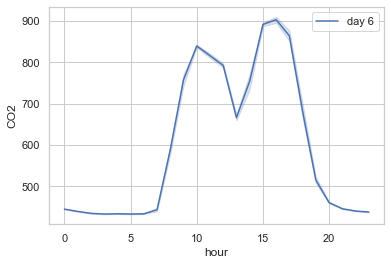

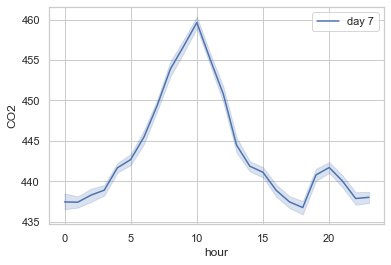

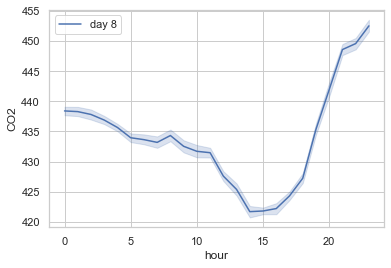

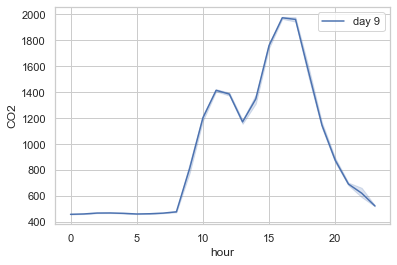

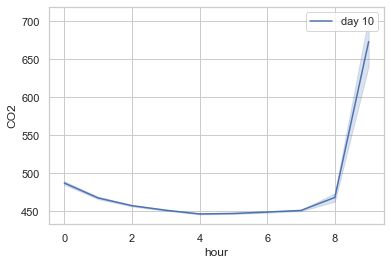

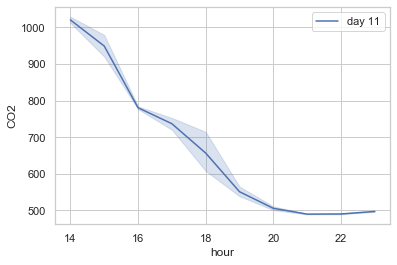

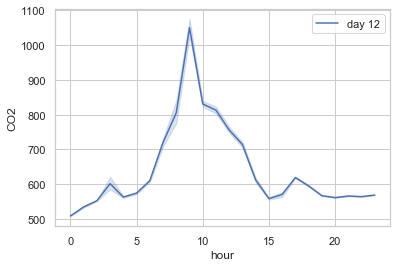

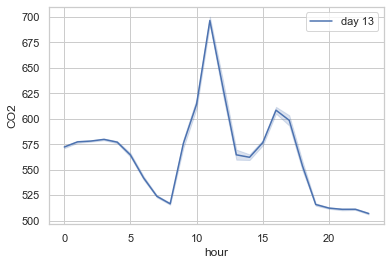

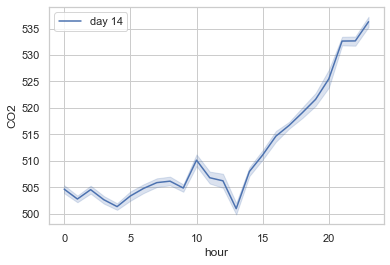

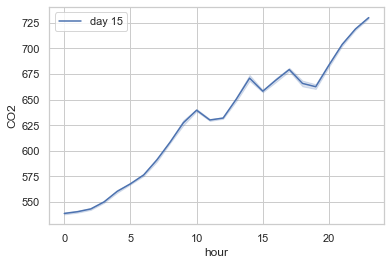

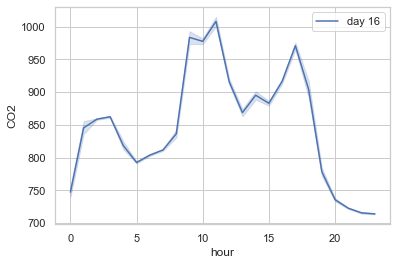

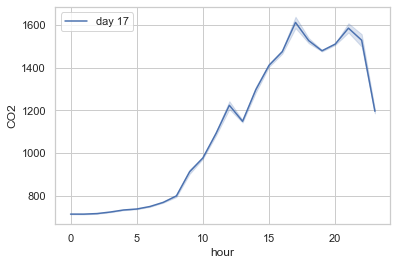

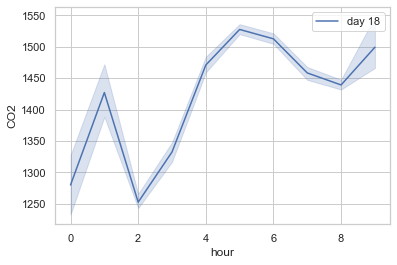

Wall time: 15.8 s


In [18]:
%%time
#plt.figure(figsize=(20,10))
sns.set(style='whitegrid')
for i in df['day'].unique():
    sns.lineplot(x="hour", y = 'CO2', data = df.loc[df['day'] == i], palette = 'day')
    plt.legend(['day '+ str(i)])
    plt.show()
#plt.legend(('Day 2', 'Day 3', 'Day 4', 'Day 5', 'Day 6', 'Day 7', 'Day 8', 'Day 9', 'Day 10', 'Day 11', 'Day 12', 'Day 13', 'Day 14'))

Wall time: 10.6 s


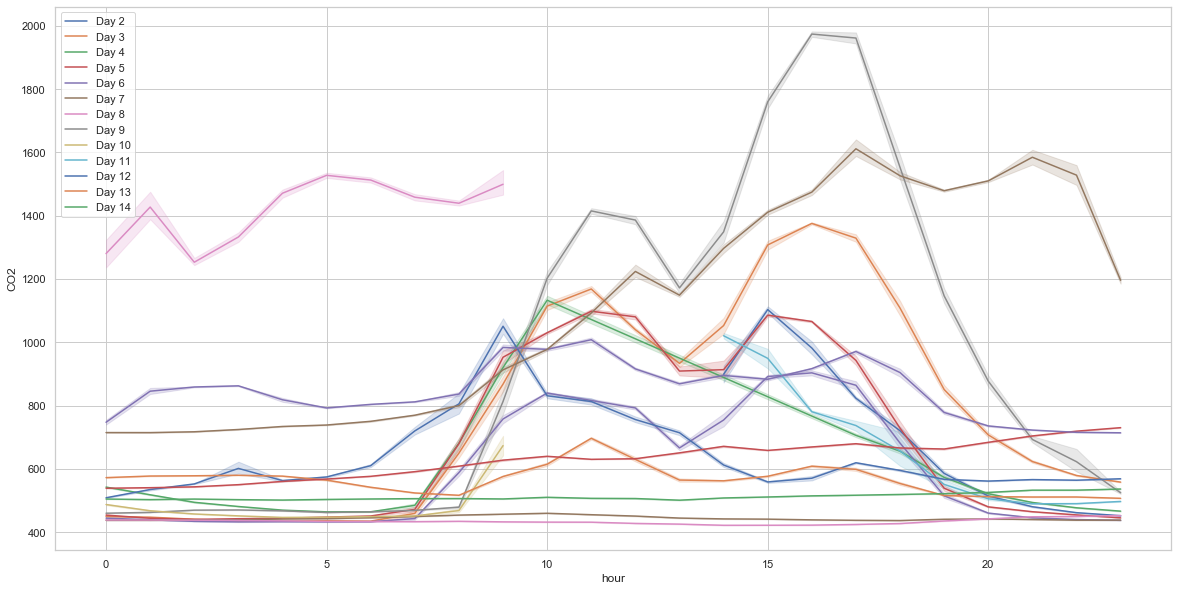

In [19]:
%%time
plt.figure(figsize=(20,10))
sns.set(style='whitegrid')
for i in df['day'].unique():
    sns.lineplot(x="hour", y = 'CO2', data = df.loc[df['day'] == i], palette = 'day')
plt.legend(('Day 2', 'Day 3', 'Day 4', 'Day 5', 'Day 6', 'Day 7', 'Day 8', 'Day 9', 'Day 10', 'Day 11', 'Day 12', 'Day 13', 'Day 14'))

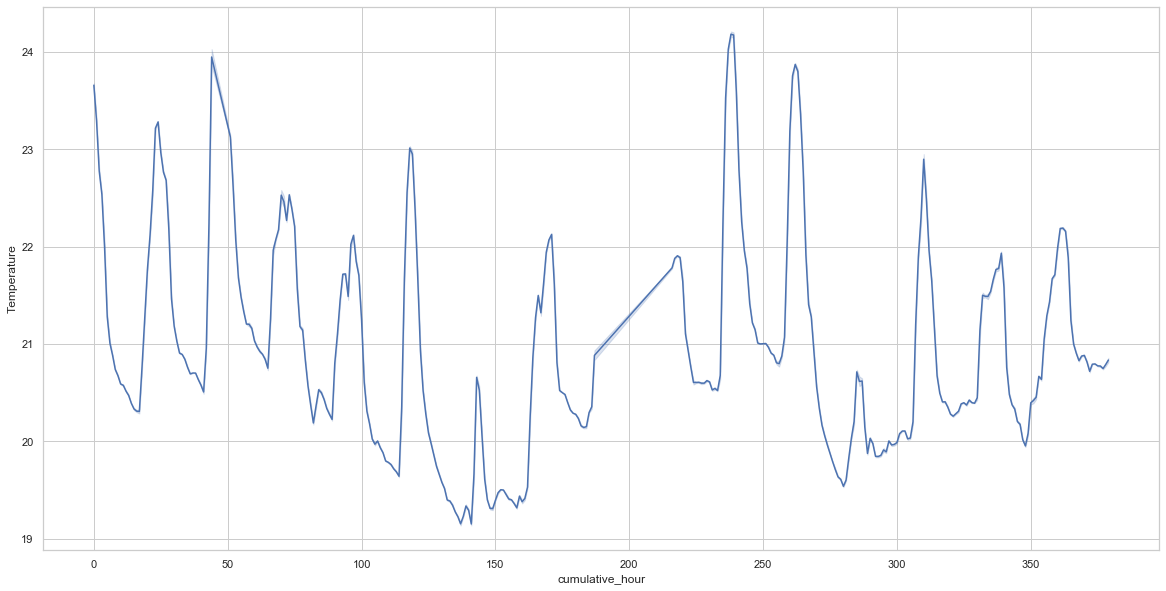

In [21]:
plt.figure(figsize = (20,10))
sns.lineplot(x="cumulative_hour", y = 'Temperature', data = df)

plt.show()

-----------------------

Gaps in the datasets: 2 gaps due to datasets composition (datatraining, datatest, datatest2)

In [25]:
df_datatest = df[:2665]
df_datatraining = df[2665:10808]
df_datatest2 = df[10809:]
df_datatraining.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,day,hour,minute,day_minute,cumulative_hour,cumulative_minute,weekend
2665,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1,4,17,51,1071,51,3092,0
2666,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1,4,17,52,1072,51,3093,0
2667,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1,4,17,53,1073,51,3094,0
2668,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1,4,17,54,1074,51,3095,0
2669,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1,4,17,55,1075,51,3096,0


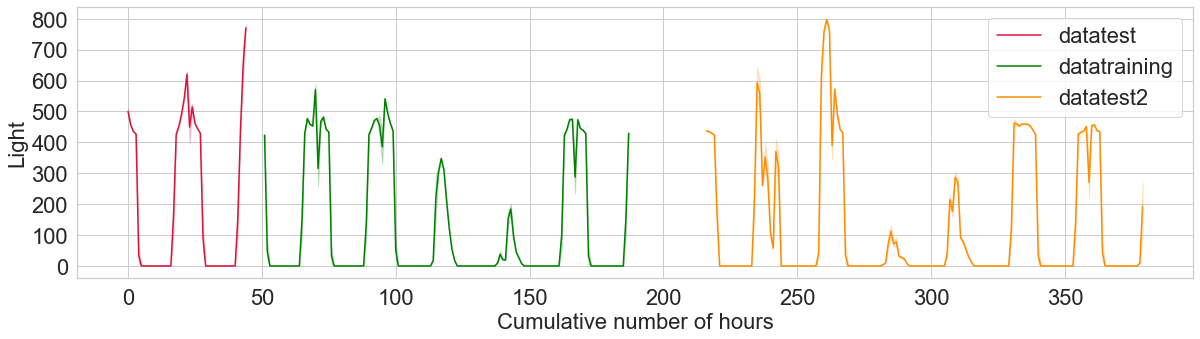

In [26]:
#df_datatraining  =pd.read_csv('datatraining.csv')
#df_datatest = pd.read_csv('datatest.csv')
#df_datatest2 = pd.read_csv('datatest2.csv')
f = 22

plt.figure(figsize = (20,5))
sns.lineplot(x="cumulative_hour", y = 'Light', data = df_datatest, color = 'crimson')
sns.lineplot(x="cumulative_hour", y = 'Light', data = df_datatraining, color = 'green')
sns.lineplot(x="cumulative_hour", y = 'Light', data = df_datatest2, color = 'darkorange')
plt.legend(['datatest', 'datatraining', 'datatest2'], fontsize=f, loc='upper right')
plt.xlabel("Cumulative number of hours", fontsize=f)
plt.ylabel("Light", fontsize=f)
plt.xticks(fontsize= f)
plt.yticks(fontsize= f)
plt.show()

------

Observing Occupancy behaviour in the dataset

Wall time: 2.24 s


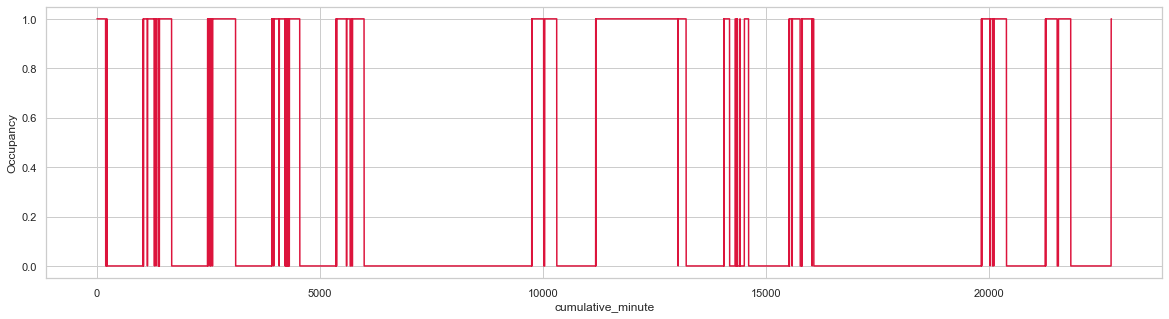

In [27]:
%%time
plt.figure(figsize=(20,5))
sns.lineplot(x='cumulative_minute', y = 'Occupancy', data = df, color = "crimson")

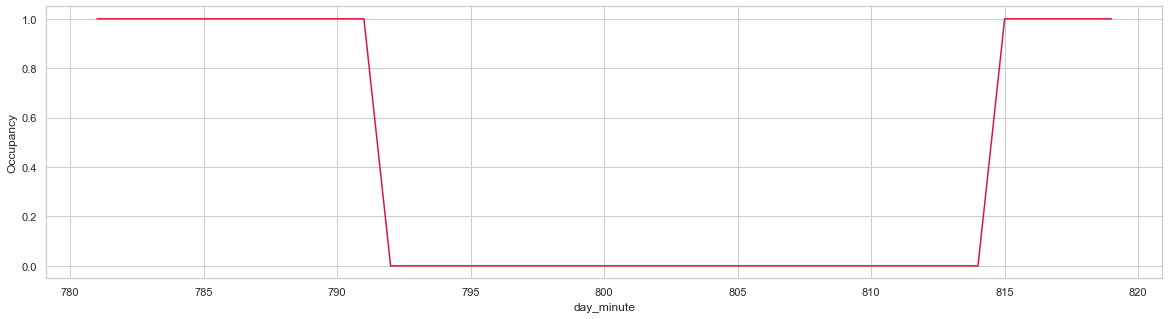

In [28]:
plt.figure(figsize=(20,5))
lunch_break = day9.loc[day9['day_minute'] < 820]
lunch_break = lunch_break.loc[day9['day_minute'] > 780]
sns.lineplot(x='day_minute', y = 'Occupancy', data = lunch_break, color = "crimson")

In [32]:
lunch_break.head(20)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,day,hour,minute,day_minute,cumulative_hour,cumulative_minute,weekend
9575,2015-02-09 13:01:00,21.5000,33.466667,464.00,1283.333333,0.005315,1,9,13,1,781,167,10002,0
9576,2015-02-09 13:01:59,21.5000,33.425000,464.00,1279.250000,0.005308,1,9,13,2,782,167,10003,0
9577,2015-02-09 13:02:59,21.5000,33.400000,464.00,1274.333333,0.005304,1,9,13,3,783,167,10004,0
9578,2015-02-09 13:04:00,21.5000,33.372500,469.25,1267.500000,0.005300,1,9,13,4,784,167,10005,0
9579,2015-02-09 13:05:00,21.5000,33.317500,474.50,1257.000000,0.005291,1,9,13,5,785,167,10006,0
9580,2015-02-09 13:06:00,21.5000,33.317500,474.50,1254.750000,0.005291,1,9,13,6,786,167,10007,0
9581,2015-02-09 13:07:00,21.5000,33.290000,471.00,1255.333333,0.005286,1,9,13,7,787,167,10008,0
9582,2015-02-09 13:08:00,21.5000,33.290000,466.75,1262.500000,0.005286,1,9,13,8,788,167,10009,0
9583,2015-02-09 13:08:59,21.5000,33.290000,469.00,1262.000000,0.005286,1,9,13,9,789,167,10010,0
9584,2015-02-09 13:09:59,21.5000,33.245000,469.00,1254.000000,0.005279,1,9,13,10,790,167,10011,0


In [33]:
df.corr()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,day,hour,minute,day_minute,cumulative_hour,cumulative_minute,weekend
Temperature,1.000000,-0.156964,0.688571,0.449989,0.205280,0.555610,-0.098631,0.235704,-0.001601,0.235422,-0.084201,-0.084205,-0.412400
Humidity,-0.156964,1.000000,-0.029459,0.299746,0.932724,0.046240,0.519647,0.115152,-0.002084,0.114961,0.528484,0.528481,0.215841
Light,0.688571,-0.029459,1.000000,0.448105,0.223329,0.914850,-0.090412,0.094255,0.020962,0.095023,-0.084802,-0.084749,-0.267150
CO2,0.449989,0.299746,0.448105,1.000000,0.477965,0.501582,0.278494,0.127377,0.000683,0.127287,0.287336,0.287339,-0.372715
HumidityRatio,0.205280,0.932724,0.223329,0.477965,1.000000,0.257324,0.474934,0.202000,-0.002736,0.201703,0.489061,0.489056,0.051735
Occupancy,0.555610,0.046240,0.914850,0.501582,0.257324,1.000000,-0.086203,0.103133,0.011854,0.103522,-0.080025,-0.079995,-0.341949
day,-0.098631,0.519647,-0.090412,0.278494,0.474934,-0.086203,1.000000,-0.081404,-0.003130,-0.081457,0.998056,0.998052,0.122249
hour,0.235704,0.115152,0.094255,0.127377,0.202000,0.103133,-0.081404,1.000000,0.002213,0.999169,-0.019122,-0.019116,0.004198
minute,-0.001601,-0.002084,0.020962,0.000683,-0.002736,0.011854,-0.003130,0.002213,1.000000,0.042970,-0.003002,-0.000450,0.000503
day_minute,0.235422,0.114961,0.095023,0.127287,0.201703,0.103522,-0.081457,0.999169,0.042970,1.000000,-0.019227,-0.019117,0.004215


In [34]:
weekend = df.loc[df['weekend'] == 1]
weekend

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,day,hour,minute,day_minute,cumulative_hour,cumulative_minute,weekend
5914,2015-02-07 00:00:00,20.0000,18.700000,0.0,438.000000,0.002696,0,7,0,0,0,106,6341,1
5915,2015-02-07 00:01:00,19.9725,18.745000,0.0,433.666667,0.002698,0,7,0,1,1,106,6342,1
5916,2015-02-07 00:02:00,20.0000,18.790000,0.0,434.500000,0.002709,0,7,0,2,2,106,6343,1
5917,2015-02-07 00:03:00,20.0000,18.700000,0.0,434.000000,0.002696,0,7,0,3,3,106,6344,1
5918,2015-02-07 00:04:00,20.0000,18.745000,0.0,438.500000,0.002703,0,7,0,4,4,106,6345,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17115,2015-02-15 23:55:00,20.2000,29.600000,0.0,728.000000,0.004332,0,15,23,55,1435,321,19296,1
17116,2015-02-15 23:55:59,20.2900,29.600000,0.0,730.500000,0.004357,0,15,23,56,1436,321,19297,1
17117,2015-02-15 23:57:00,20.2000,29.500000,0.0,738.000000,0.004318,0,15,23,57,1437,321,19298,1
17118,2015-02-15 23:57:59,20.2000,29.463333,0.0,739.000000,0.004312,0,15,23,58,1438,321,19299,1
